<a href="https://colab.research.google.com/github/harshit5166/Excel/blob/main/PROJECT_CAPSTONE_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Salifort Motors***
---


---


This project involves analyzing a dataset and building predictive model to provide insights to the Human Resources (HR) department of Salifort Motors, a large consulting firm.

The goal is to predict whether an employee will leave the company using a regression model.

Your deliverables should include model evaluation (and interpretation if applicable), relevant data visualization(s), ethical considerations, and a list of resources used for troubleshooting and finding solutions.


---



---



We will use PACE framework for this projects from start to finish. PACE stands for Plan, Analyse, Construct and Execute. It will provide us a structured approach to problem-solving and decision-making, ensuring clarity and efficiency throughout the data analysis process

## 1. Plan
**Reflect on these questions as you complete the plan stage.**
1. Who are your stakeholders for this project?
2. What are you trying to solve or accomplish?
3. What are your initial observations when you explore the data?
4. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
5. Do you have any ethical considerations in this stage?


---



In [ ]:
# import packages

import numpy as np
import pandas as pd

# for visualizations(graphs)
import matplotlib.pyplot as plt
import seaborn as sns

# for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# for metrics and evaluation
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#read dataset from csv file
df=pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info() #basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe() # descriptive stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Familiarize yourself with the HR dataset

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables:

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [ ]:
df=df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'avg_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'dept'})      # rename columns for easy code typing

In [ ]:
# check for missing values in the dataset

df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
avg_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
dept,0
salary,0


In [ ]:
# check for duplicates

df.duplicated().sum()

np.int64(3008)

A significant amout of rows contain duplicates. 3009/14999 ~ 0.20 ---> 20% of the data

In [ ]:
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,dept,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
df1=df.drop_duplicates(keep='first')   #  keeping the 1st value
df1.head()


,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: title={'center': 'Boxplot to detect outliers in Tenure'}, xlabel='tenure'>

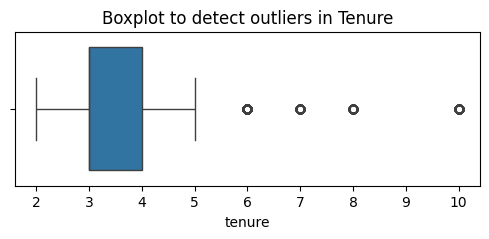

In [ ]:
# now check for outliers in the data
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers in Tenure')
sns.boxplot(x=df1['tenure'])

In [ ]:
# we can observe that there are several outliers in Tenure column

percentile25=df1.tenure.quantile(0.25)
percentile75=df1.tenure.quantile(0.75)
print(' percentile25 : ',percentile25,'\n','percentile75 : ',percentile75)

# Inter quartile range
iqr=percentile75-percentile25
print(' Inter Quartile Range : ',iqr)

lower_limit=percentile25-1.5*iqr
upper_limit=percentile75+1.5*iqr
print(' Lower Limit',lower_limit,'\n','Upper Limit',upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print(" Number of rows in the data containing outliers in `tenure`:", len(outliers))

 percentile25 :  3.0 
 percentile75 :  4.0
 Inter Quartile Range :  1.0
 Lower Limit 1.5 
 Upper Limit 5.5
 Number of rows in the data containing outliers in `tenure`: 824


In [ ]:
# The decision to remove or retain outliers in a dataset depends on the type of model being used.
# Some models are particularly sensitive to the presence of outliers and can be significantly affected by them.


## 2. Analyze
**Reflect on these questions as you complete the analyze stage.**
1. What did you observe about the relationships between variables?
2. What do you observe about the distributions in the data?
3. What transformations did you make with your data? Why did you chose to make those decisions?
4. What are some purposes of EDA before constructing a predictive model?
5. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
6. Do you have any ethical considerations in this stage?

### EDA

In [ ]:
# Our goal is to make a model that will will predict whether an employee will leave the Organization or not.
print(df1.left.value_counts())
print(df1.left.value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


#### Data Visualizations
Now, examine variables that you're interested in, and create plots to visualize
relationships between variables in the data.

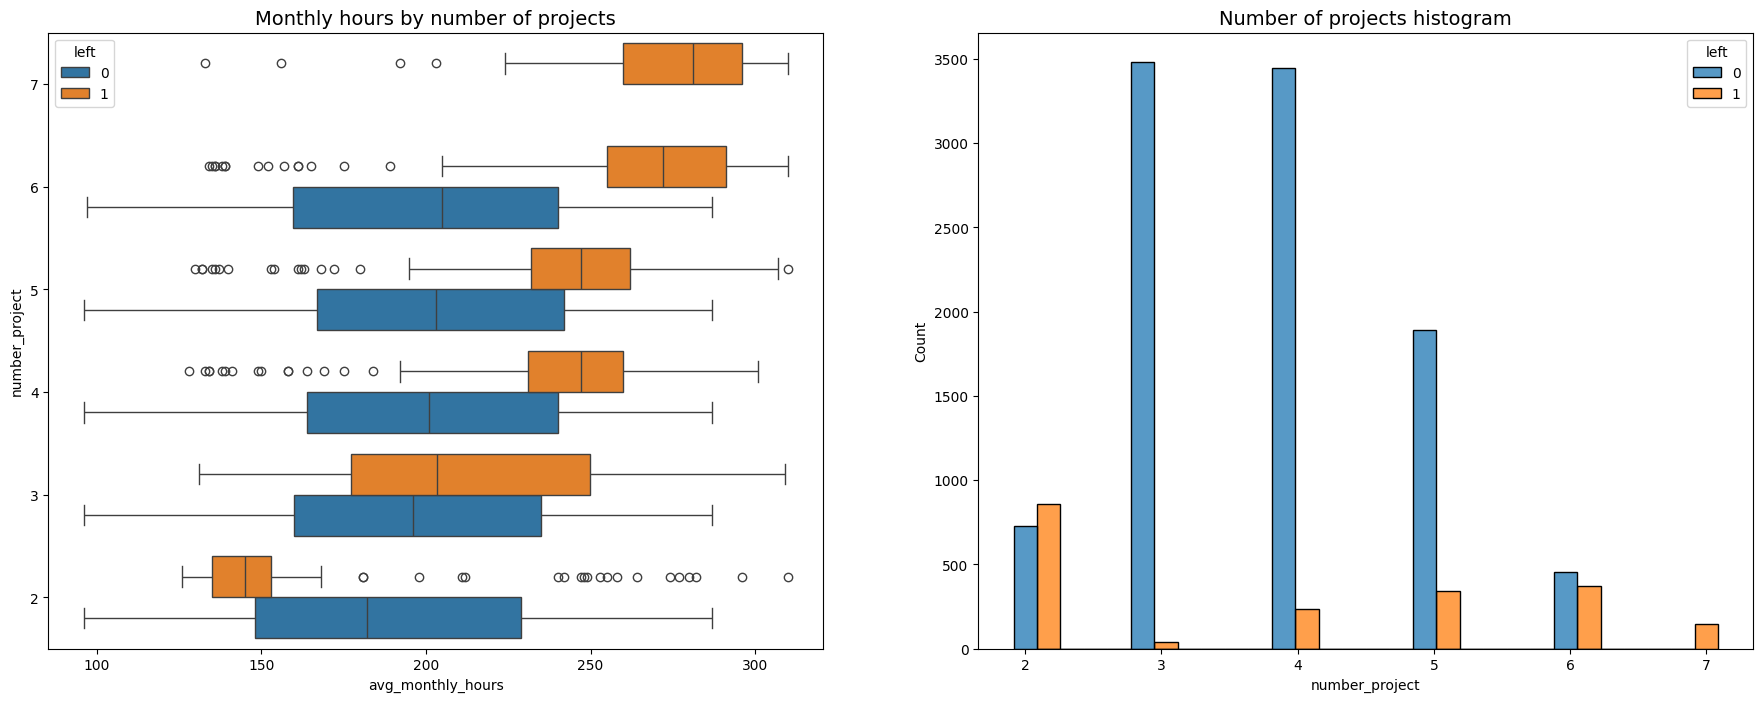

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='avg_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()


It seems that employees who work on more projects tend to work more hours, which is expected. However, the plots reveal some interesting points about employees who left the company:

Two groups of leavers: There are two distinct groups of employees who left: those who worked significantly fewer hours than their peers on similar projects (possibly fired or on their way out) and those who worked much longer hours (likely quit due to overwork).
Employees with many projects: All employees working on seven projects left the company, and those with six or seven projects consistently worked very long hours (around 255–295 hours per month).
Optimal project load: Employees working on 3–4 projects appear to be the most likely to stay with the company, as the ratio of those who left to those who stayed is very low in these groups.
Overwork: Compared to a standard 40-hour work week with two weeks of vacation (averaging about 167 hours per month), most employees, even those who stayed, seem to be working considerably longer hours, suggesting a potential issue with overwork.
To confirm the observation about employees with seven projects, you could check if all employees with number_project equal to 7 have left.



In [ ]:
df1[df1['number_project']==7]['left'].value_counts()

,count
left,
1,145


This confirms that all employees with 7 projects did leave.

Next, you could examine the average monthly hours versus the satisfaction levels.

<Axes: xlabel='avg_monthly_hours', ylabel='satisfaction_level'>

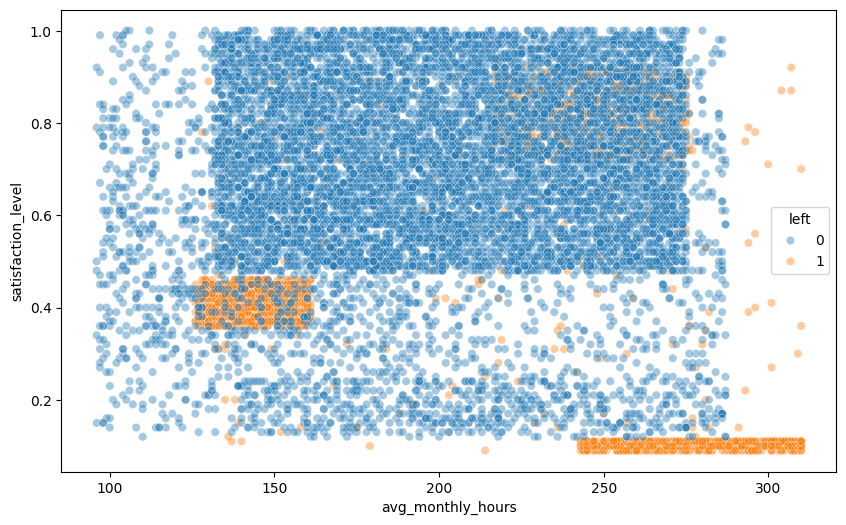

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

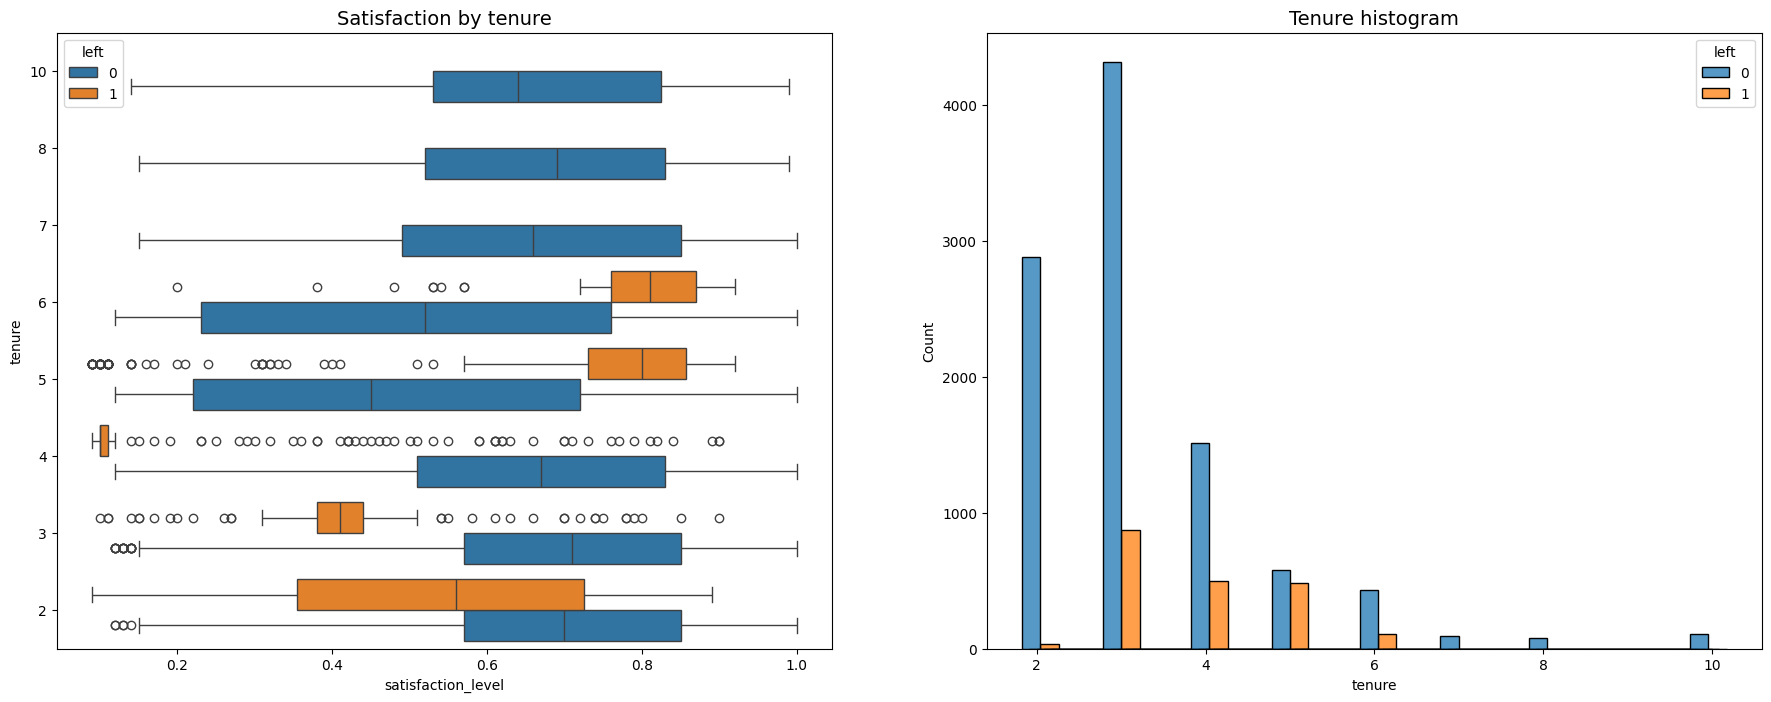

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations you could make from this plot.

Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.
As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

/tmp/ipython-input-1074052523.py:2: FutureWarning: The provided callable <function mean at 0x7a8310121c60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
/tmp/ipython-input-1074052523.py:2: FutureWarning: The provided callable <function median at 0x7a8310071f80> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, you could examine salary levels for different tenures.

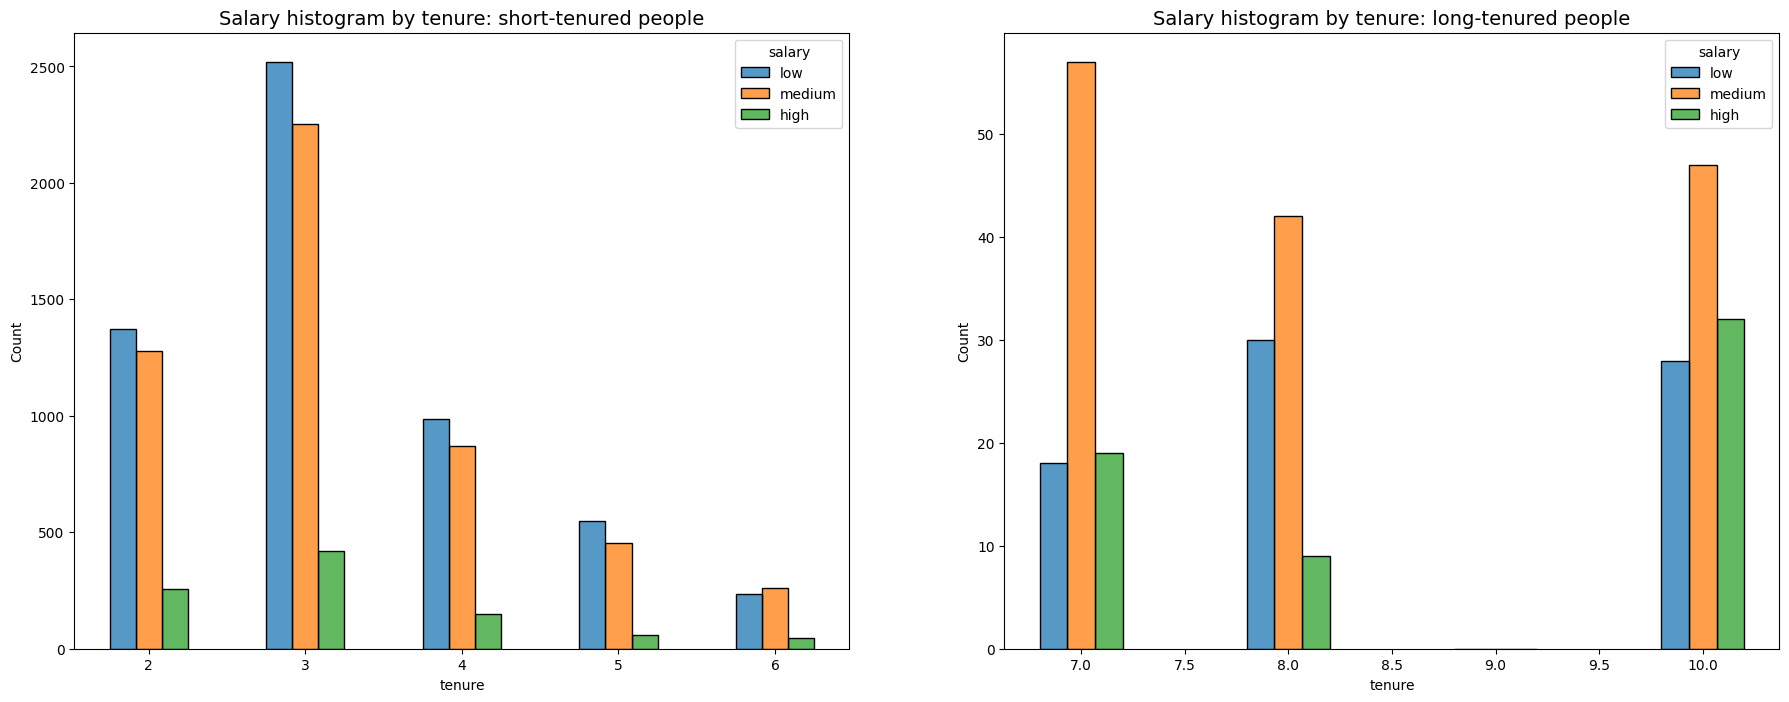

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

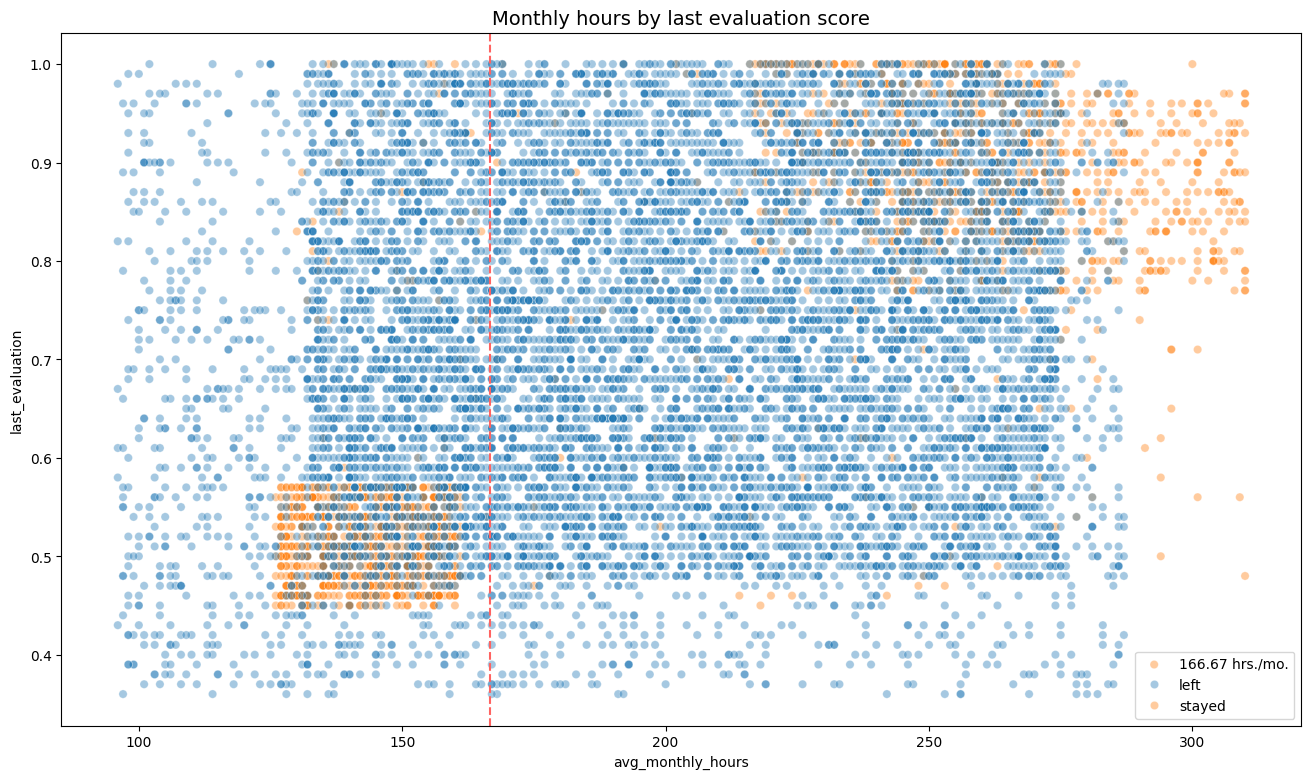

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

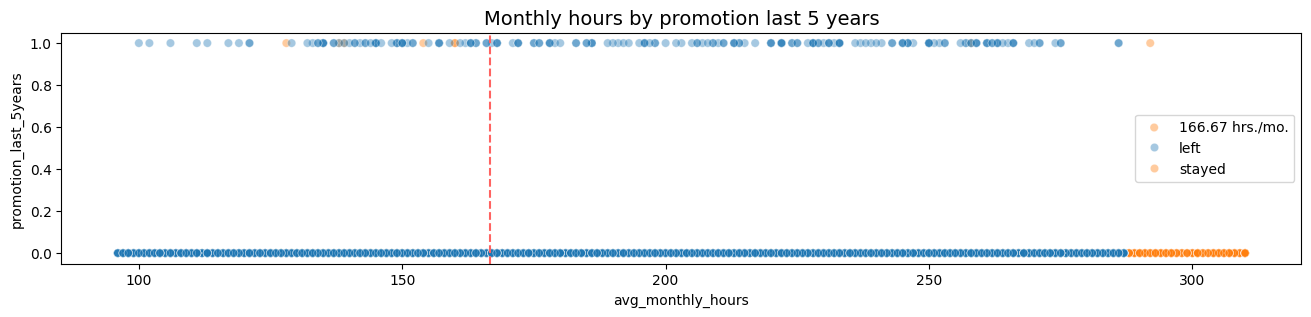

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, you could inspect how the employees who left are distributed across departments.

In [ ]:
# Display counts for each department
df1["dept"].value_counts()


,count
dept,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


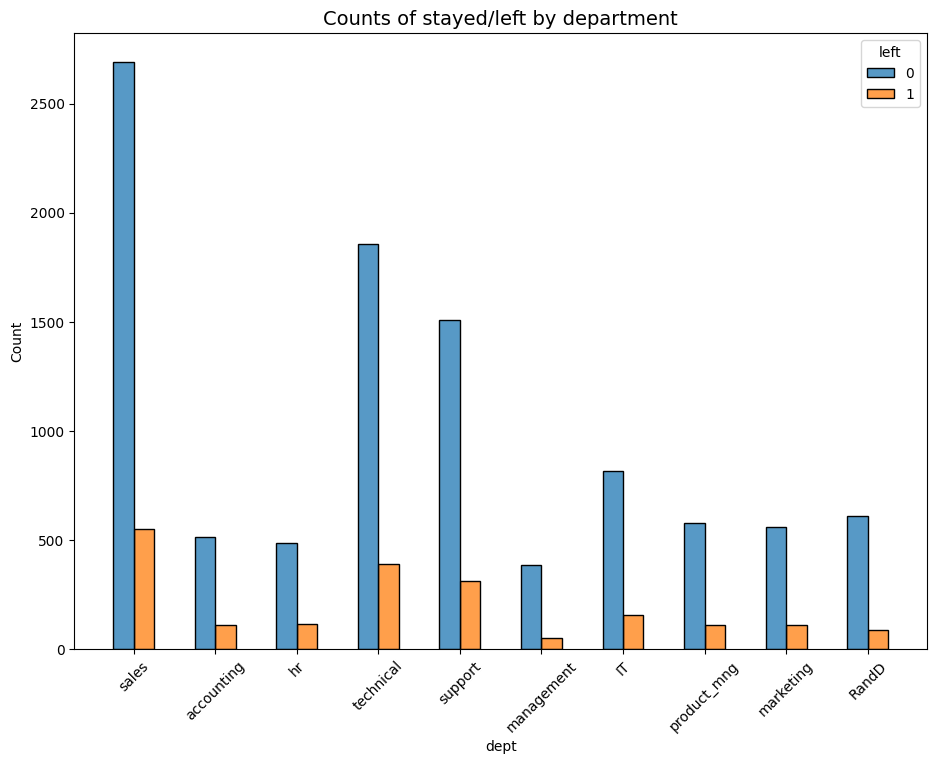

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='dept', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, you could check for strong correlations between variables in the data.

In [ ]:
dfk=df1.drop(columns=['dept','salary'])
dfk.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


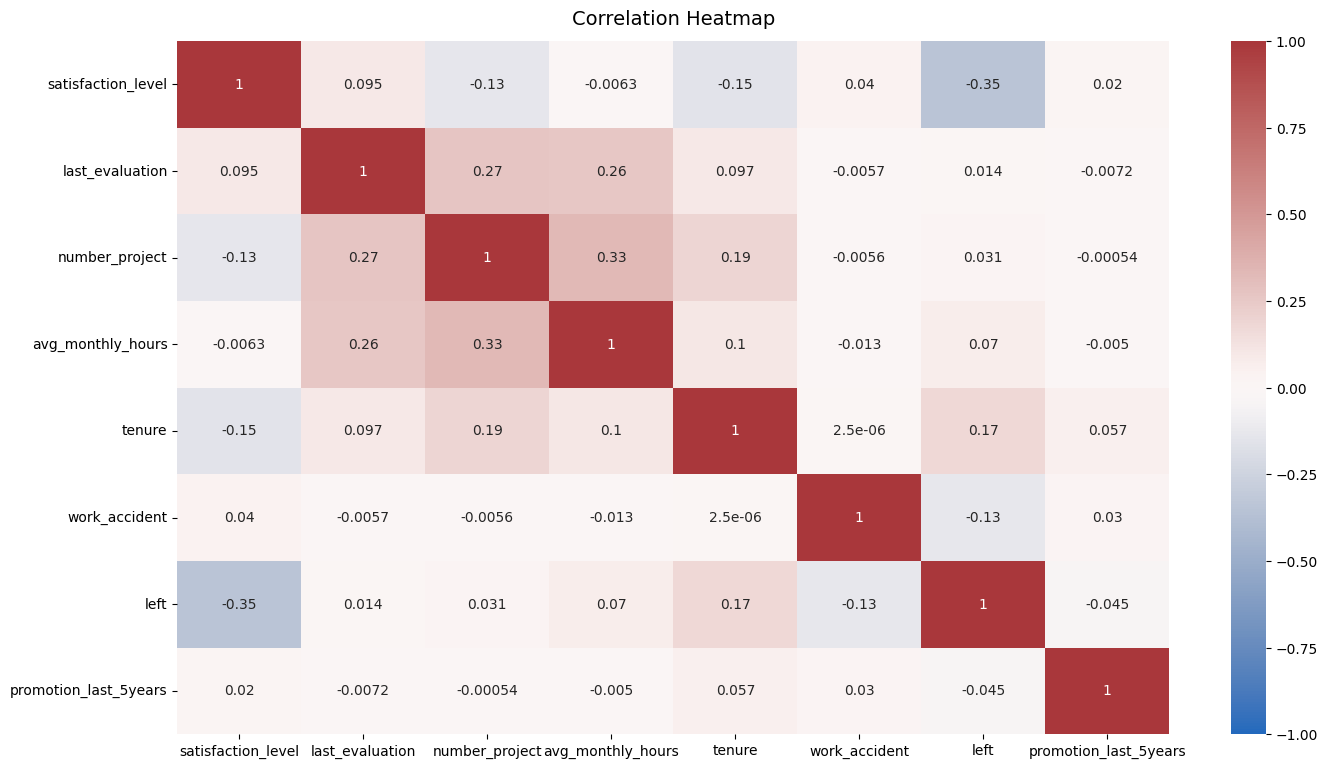

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap=sns.heatmap(dfk.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.



---


It appears that employees are leaving the company as a result of poor
management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.


---



## Construct
1. Determine which models are most appropriate
2. Construct the model
3. Confirm model assumptions
4. Evaluate model results to determine how well your model fits the data


 **We will use Logistic Regression Model**

In [ ]:
# Logistic Regression Model Assumptions

# Outcome variable is categorical
# Observations are independent of each other
# No severe multicollinearity among X variables
# No extreme outliers
# Linear relationship between each X variable and the logit of the outcome variable
# Sufficiently large sample size


In [ ]:
# Our goal is to predict whether an employee leaves the company, which is a categorical outcome variable.
#  Therefore, this involves Classification, More specifically binary classification
#   (1---->Left the company)
#   (0---->Didn't leave the company)

**Binary Logistic Regression**

Make all the categorical  (salary and dept) columns numeric.

In [ ]:
df_enc=df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary']=(
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc=pd.get_dummies(df_enc, drop_first=False,dtype=int)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


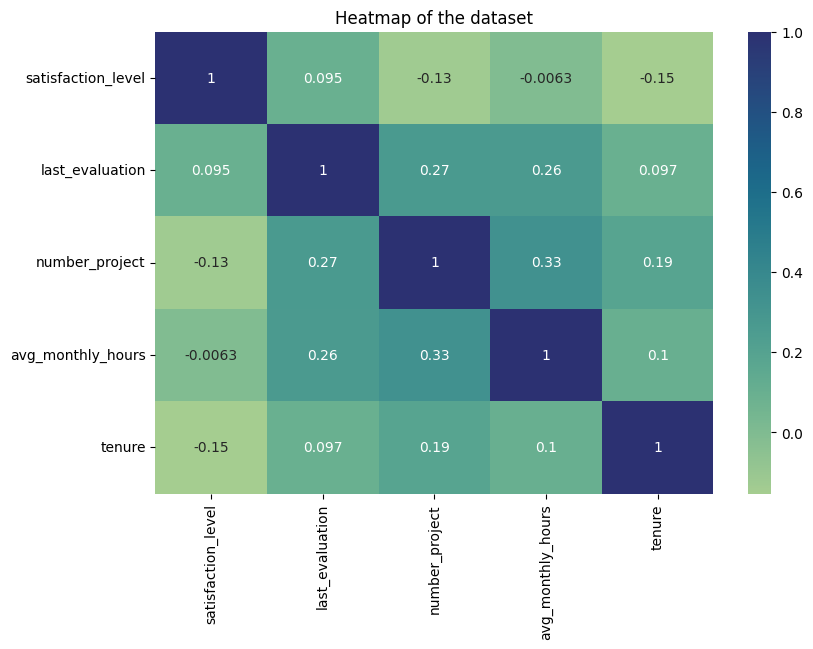

In [ ]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'avg_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()


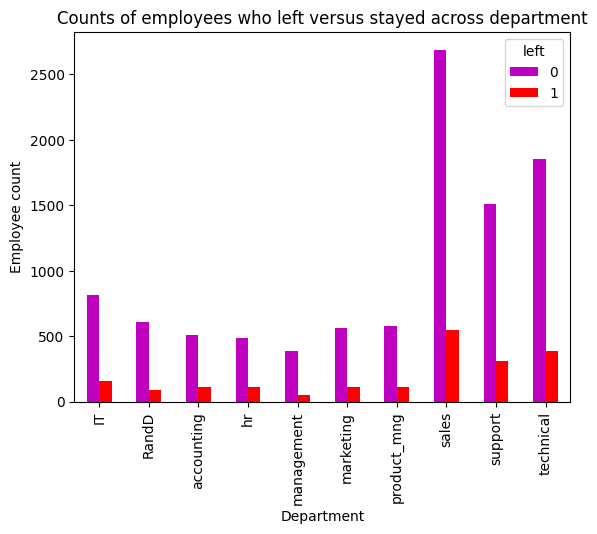

In [ ]:
pd.crosstab(df1['dept'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [ ]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y=df_logreg['left']
y.head()

,left
0,1
2,1
3,1
4,1
5,1


In [ ]:
X=df_logreg.drop(columns=['left'],axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# split the data into training and testing subsets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [ ]:
log_clf=LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
y_pred=log_clf.predict(X_test)

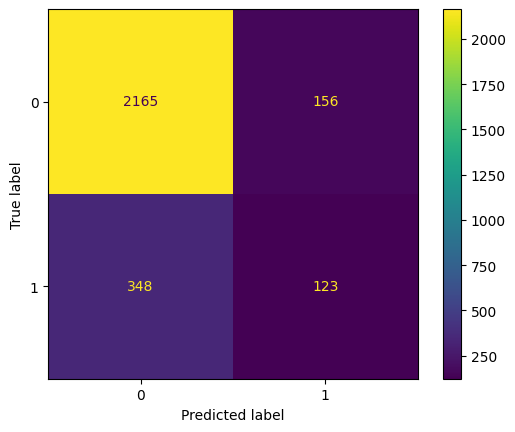

In [ ]:
log_cm=confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp=ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

#confusion matrix
log_disp.plot(values_format='')

plt.show()

* Top Left Quadrant                 ---> True Negatives ---> (The number of people who did not leave that the model accurately predicted did not leave)
* Top Right Quadrant              ---> False Positives ---> (The number of people who did not leave the model inaccurately predicted as leaving)
* Bottom Left Quadrant          ---> False Negatives ---> (The number of people who left that the model inaccurately predicted did not leave)
* Bottom Right Quadrant       ---> True Positives ---> (The number of people who left the model accurately predicted as leaving)

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.


In [ ]:
# Now to evaluate the performance of this Logistic Regression Model, We will find few evaluation Metrics like Accuracy, Precision, f1 score and Recall
# First check class imbalance because this is Binary Logistic Regression and class imbalace informs the way we interpret accuracy metrics

In [ ]:
df_logreg['left'].value_counts(normalize=True)

,proportion
left,
0,0.831468
1,0.168532


Split - 83% - 17% ----> Not perfectly balanced  but not too imbalanced

If severe imbalance(90%+) then we do resampling to make it more balanced

In [ ]:
target_names=['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower

# Execute
- Interpret model performance and results
- Share actionable steps with stakeholders

* AUC is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.

* Precision measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.

* Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.

* Accuracy measures the proportion of data points that are correctly classified.

* F1-score is an aggregation of precision and recall

### Summary of model results


The logistic regression model achieved :
* precision of 80%
* recall of 83%
* f1-score of 80%
* accuracy of 83%, on the test set.

**all weighted averages

### Conclusion, Recommendations

The model confirms that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.
